### `Disease Prediction Classification with Machine Learning Algorithm`

#### import necessary libraries especially `Scikit-Learn` package

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

### <center> Data Collection and Analyzing


<ul><b>1- <mark>Filling or imputing (removing) missing data</ul>
<ul><b>2- <mark>Split Data into two sections X and Y which are for Features Variables and Target label(s)</ul>
<ul><b>3- <mark>Transform data from String or non-numerical to numerical for the machine to perform better</ul>
<ul><b>4- <mark> Split data into train and test sets to be ready for the model</ul>

#### Here is the time of reading training dataset

In [2]:
data_train = pd.read_csv('/Users/rezakharamani/Documents/GitHub/DiseasePredictionClassification/dataset/Training.csv')

In [3]:
## Notice : in this CSV file the last column is completely empty and it should not be considered in the training section
data_train = data_train.iloc[:, :-1]
data_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


#### Working on Target Column in order to be analyzed 

In [4]:
TargetLabel = data_train["prognosis"].value_counts()
DataFrame = pd.DataFrame({
    "Desiase": TargetLabel.index,
    "Count" : TargetLabel.values
})
print(f"The Number of recognized diseases is {len(DataFrame)} that the Number of each of them is {DataFrame.iloc[1,1]}")

The Number of recognized diseases is 41 that the Number of each of them is 120


In [5]:
DataFrame

,Desiase,Count
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


#### We want to plot the Disease oin the barchar or graph chart 

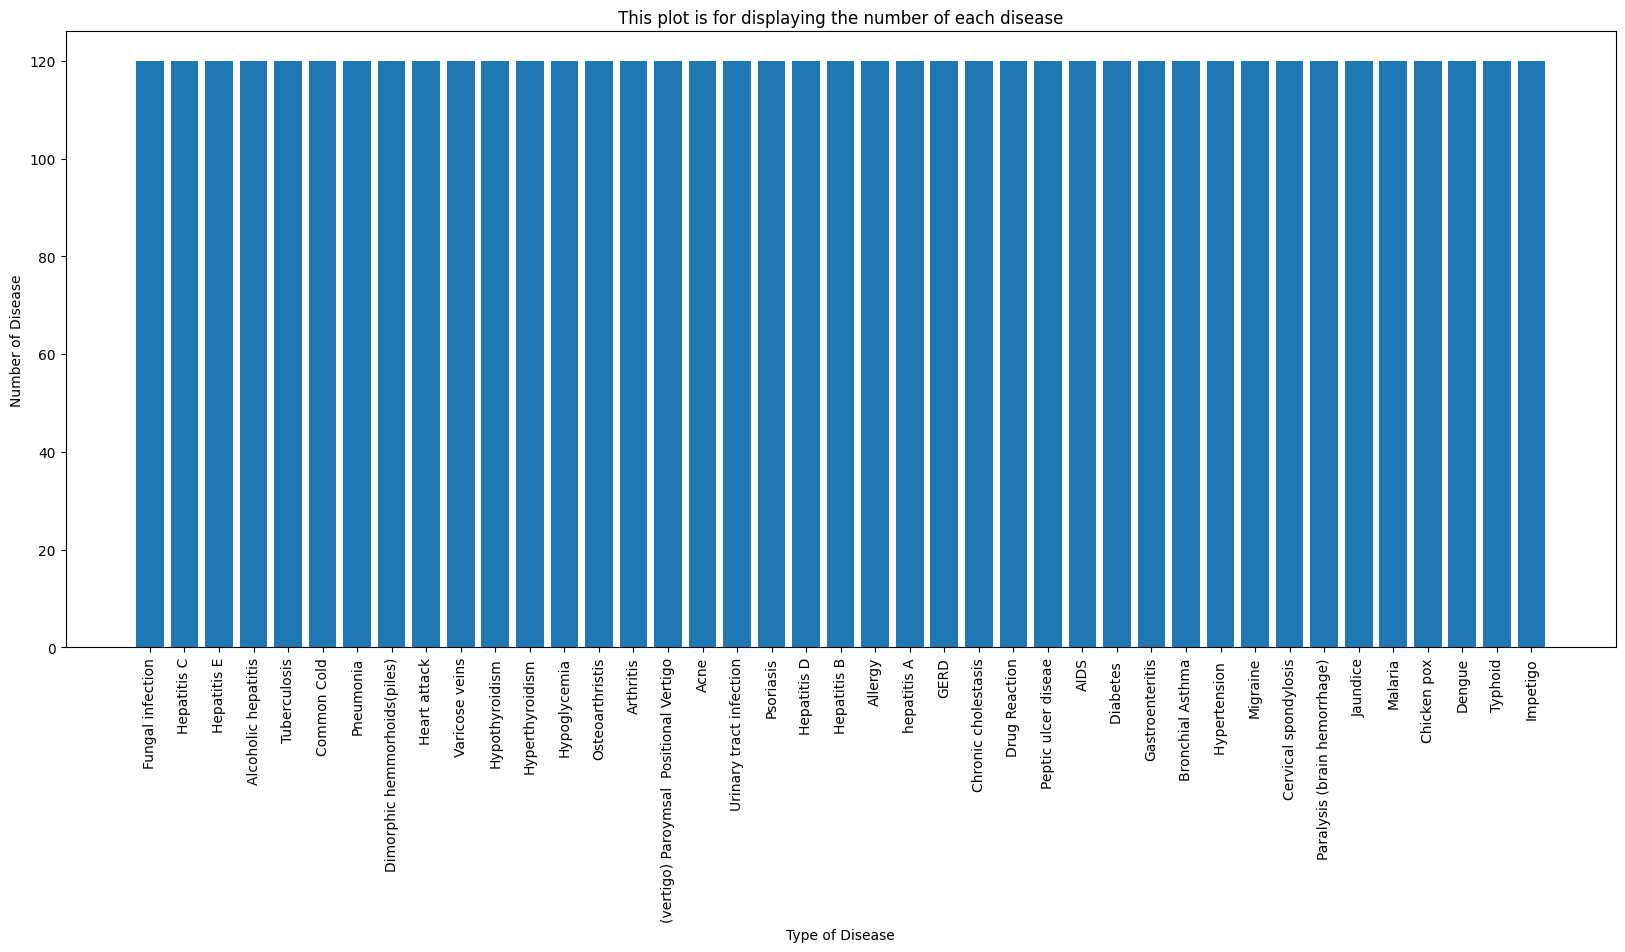

In [6]:
plt.figure(figsize=(20,8))
plt.bar(x=DataFrame.iloc[:,0], height=DataFrame.iloc[:,1])
plt.title("This plot is for displaying the number of each disease")
plt.xticks(rotation='vertical')
plt.xlabel("Type of Disease")
plt.ylabel("Number of Disease")
plt.show()


## <center> Data Cleaning and Imputing (Imputation)

##### In this section we have to find the NaN values 
    --> if the target value has NaN values, we should remove the row of that index
    --> if the feature values have NaN avlues, we should fill the fileds with data Manually or by Imputation

In [7]:
data_train.dropna(subset=["prognosis"], inplace=True)

In [8]:
# for target value 
Feature_Section = data_train.drop("prognosis", axis = 1)
Target_Section = data_train["prognosis"]

In [9]:
# count NaN values
Feature_Section.isna().sum() # for each column
sum(Feature_Section.isna().sum())

0

In [10]:
Target_Section.isna().sum()

0

- There is no NaN values in both sections Features and Target columns
- but we do Manually and Python library Imputing to solve other problems and soltions in the next problems

### Manual Imputation 

In [11]:
CountData = Feature_Section["itching"].value_counts()
print(CountData)

print(f"to get the maximum number between 0 and 1 we use idmax which is --> {CountData.idxmax()}")

itching
0    4242
1     678
Name: count, dtype: int64
to get the maximum number between 0 and 1 we use idmax which is --> 0


In [12]:
Feature_Section["itching"].fillna(0)
Feature_Section["itching"].fillna(1)
Feature_Section["itching"].fillna(data_train["itching"].value_counts().idxmax(), inplace=True)

# this code is manually filling the NaN values for column "itching" with 0 or 1 or Max Number index
# if there are various other numbers, for example we can get the mean of the numebers to fill the NaN space

/var/folders/l2/rc9k_3zs61s4vcmxpfwhs58h0000gn/T/ipykernel_5870/4204281587.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Feature_Section["itching"].fillna(data_train["itching"].value_counts().idxmax(), inplace=True)



***strategy***, default=’mean’ The imputation strategy.

    If mean, then replace missing values using the mean along each column. Can only be used with numeric data.
    If median, then replace missing values using the median along each column. Can only be used with numeric data.
    If most_frequent, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
    If constant, then replace missing values with fill_value. Can be used with strings or numeric data.

fill_value str or numerical value, default=None

When strategy == “constant”, fill_value is used to replace all occurrences of missing_values. For string or object data types, fill_value must be a string. If None, fill_value will be 0 when imputing numerical data and “missing_value” for strings or object data type

### Apply Imputing on Feature values not Target Values

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# we should fillna values for features not target values, 
# and instead if there are nan values in target value, remove the related row for that 

# list of the Columns 
MostFrequent = ["itching","skin_rash"]
StringMissing = ["nodal_skin_eruptions"]
MeanValue = ["chills"]

MostFrequentImputer = SimpleImputer(strategy="most_frequent")
StringMissingImputer = SimpleImputer(strategy="constant", fill_value=0)
MeanValueImputer = SimpleImputer(strategy="mean")

transformer = ColumnTransformer(
    [
        ("MostFrequent Imputer", MostFrequentImputer, MostFrequent),
        ("String Imputer", StringMissingImputer, StringMissing),
        ("Mean Imputer", MeanValueImputer, MeanValue)
    ], 
    remainder="passthrough"
)

FeaturesTransformed = transformer.fit_transform(Feature_Section)
FeaturesTransformed


# remainder = "passthrough" is used to attach all of the remained and not Imputed to the dataframe 
# remainder = "drop" is used to the drop the unimputed columns or values in the feature section


array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 1.]])

In [14]:
Feature_Section = pd.DataFrame(FeaturesTransformed, columns= Feature_Section.columns.tolist())
Feature_Section

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4918,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


### Encoding Section 


`LabelEncoder:` ** if there is no category in the column to be converted **
    
Purpose: LabelEncoder is used to convert categorical labels (textual categories) into numerical labels.

Functionality: It assigns a unique integer to each category, essentially converting them into numerical form.

`OneHotEncoder:` ** if there is categorical string or Numerical values in the columns**

Purpose: OneHotEncoder is used to <u>convert categorical integer features</u> (which may result from using LabelEncoder) into a one-hot encoded format.

Functionality: It creates binary columns for each category and represents the presence or absence of a category with 1 or 0.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


encoder = LabelEncoder()
TargetValueConverted = encoder.fit_transform(Target_Section)
TargetValueConverted

array([15, 15, 15, ..., 38, 35, 27])

In [16]:
Target_Section = pd.DataFrame(TargetValueConverted, columns=["prognosis"])

In [17]:
Target_Section

,prognosis
0,15
1,15
2,15
3,15
4,15
...,...
4915,0
4916,2
4917,38
4918,35


# Split data into train and test sections for training the model

In [18]:
x_train, x_test, y_train, y_test = train_test_split(Feature_Section, Target_Section, test_size=0.2)

In [19]:
x_train.shape, x_test.shape

((3936, 132), (984, 132))

In [20]:
y_train.shape, y_test.shape

((3936, 1), (984, 1))

# Import Classification Algorithms to train the model

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [22]:
y_pred = model.predict(x_test)

In [23]:

# Ecaluate  

from sklearn.metrics import accuracy_score

accuracy  = accuracy_score(y_test, y_pred)
print(f"The accuracy acquired from Random Forest Classifier is {(accuracy * 100):.0f}%")

The accuracy acquired from Random Forest Classifier is 100%


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


model_path = {
    
    "RandomForest": RandomForestClassifier(),
    "NaiveBayse": GaussianNB(),
    "SVC": SVC()
}

def getScore(estimator, X,y_test):
    y_pred = estimator.predict(X)
    return accuracy_score(y_test, y_pred)



for model in model_path:
    model = model_path[model]
    Cross_Scores = cross_val_score(model, Feature_Section ,Target_Section, cv=10, n_jobs=-1, scoring= getScore)
    
    print(f"The Accuracy for 10 folds of the model {model} is {Cross_Scores}")
    print(f"The Accuracy for model {model} is {np.mean(Cross_Scores)}")
    



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

The Accuracy for 10 folds of the model RandomForestClassifier() is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The Accuracy for model RandomForestClassifier() is 1.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

The Accuracy for 10 folds of the model GaussianNB() is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The Accuracy for model GaussianNB() is 1.0
The Accuracy for 10 folds of the model SVC() is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The Accuracy for model SVC() is 1.0


### some info about cross-validation kFold : (if we use cross-validation kFolds, we should feed X and Y data into the function not splitted data like x_train, x_test ....)

sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, params=None, pre_dispatch='2*n_jobs', error_score=nan)

`estimator:` it is the algorithm we use for training the data like RandomForestClassifier, SVC and so on...

`X:` it is the feature values data like Feature_Section

`y:` it is the Target values data like Target_section 

`cv:` it is the number of kFolds
        - if it is none the default number is 5
        - or costumized number like 3, 8, 10 ... 

`n_jobs:` n_jobs is an integer, specifying the maximum number of concurrently running workers. If 1 is given, no joblib parallelism is used at all, which is useful for debugging. If set to -1, all CPUs are used. For n_jobs below -1, **(n_cpus + 1 + n_jobs)** are used. For example with n_jobs=-2, all CPUs but one are used.
n_jobs is None by default, which means unset; it will generally be interpreted as n_jobs=1, unless the current joblib.Parallel backend context specifies otherwise.